In [137]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [136]:
cd ..

/home/ck


In [148]:
path = cnst.network_data + 'figs/LSTA/corrected_LSTA/new/wavelet_coefficients'
dic = pkl.load(open(path+"/coeffs_nans_stdkernel_USE_20UTC_15000_-60.p", "rb"))

In [149]:
scales = dic['scales']
nbcores = dic['nbcores']
nbrcores = dic['nbrcores']
del dic['scales']
del dic['nbcores']
del dic['nbrcores']
del dic['kernel']

In [146]:
for l in dic.keys():
    if l == 'scales':
        continue
    if 'pos' in l:
        (dic[l])[0] = np.nanmean((dic[l])[0], axis=0)
        (dic[l])[1] = np.nanmean((dic[l])[1], axis=0)
    else:
        (dic[l])[0] = np.nanmean((dic[l])[0], axis=0)
        try:
            (dic[l])[1] = np.nanmean((dic[l])[1], axis=0)
        except IndexError:
            continue

In [147]:
dic['SN-pos'][0].shape

(11, 201)

In [142]:
scales

array([  9.        ,  12.29436231,  16.79459385,  22.94209129,
        31.33982028,  42.81145614,  58.48217254,  79.88900199,
       109.13159279, 149.07814903, 203.64675298])

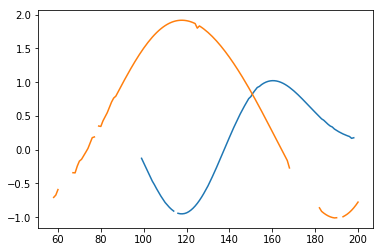

In [151]:
plt.plot(np.arange(0,201,1),dic['SN-pos'][0][55][8])
plt.plot(np.arange(0,201,1),dic['SN-pos'][1][55][9])

In [135]:
plt.plot(dic['WE-pos'][0][200][8])
plt.plot(dic['WE-pos'][1][200][8])

IndexError: index 200 is out of bounds for axis 0 with size 11